In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("Query_Result.csv")

In [14]:
# Rename the column name
data = data.rename({'m':'DATE','TagName':'TAG','Unnamed: 2':'POSTS'}, axis=1)

In [16]:
# Look at The First 5 rows of data
data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [17]:
# Look at the Last 5 rows of data
data.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [26]:
# see How many columns and rows it have
print(data.shape)
print(data.columns)

(1991, 3)
Index(['DATE', 'TAG', 'POSTS'], dtype='object')


In [29]:
# see how many entries in DATE
data.groupby(['DATE']).count()

,TAG,POSTS
DATE,,
2008-07-01 00:00:00,1,1
2008-08-01 00:00:00,11,11
2008-09-01 00:00:00,12,12
2008-10-01 00:00:00,11,11
2008-11-01 00:00:00,12,12
...,...,...
2020-03-01 00:00:00,14,14
2020-04-01 00:00:00,14,14
2020-05-01 00:00:00,14,14


In [50]:
# see how many entries in TAG
tag_data_post = data.groupby(["TAG"]).sum()
# see how many months entries in TAG
tag_data_months = data.groupby(["TAG"]).count()

In [51]:
# Print the data
tag_data_post

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [55]:
# Most Post
print(f"Most Posts: {tag_data_post['POSTS'].max()}")
print(f"Months of Post: {tag_data_months['DATE'].max()}")

Most Posts: 2056510
Months of Post: 145


In [60]:
# Clean the Data
# Change date from dd-mm-yyyy hh:mm:ss to dd-mm-yyy
# first we change the data type from string to datetime 
data['DATE']=pd.to_datetime(data['DATE'])
data

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


In [73]:
# Pivot the data
pivoted_data = data.pivot(index='DATE',columns='TAG',values='POSTS')
print(pivoted_data.shape)
print(list(pivoted_data.columns))

(145, 14)
['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift']


In [78]:
# check if there's a null value
pivoted_data.isna().any()

TAG
assembly       True
c              True
c#            False
c++            True
delphi         True
go             True
java           True
javascript     True
perl           True
php            True
python         True
r              True
ruby           True
swift          True
dtype: bool

In [79]:
# fill the null data
pivoted_data = pivoted_data.fillna(0)

In [80]:
# Check if the value is updated or not
pivoted_data.isna().any()

TAG
assembly      False
c             False
c#            False
c++           False
delphi        False
go            False
java          False
javascript    False
perl          False
php           False
python        False
r             False
ruby          False
swift         False
dtype: bool

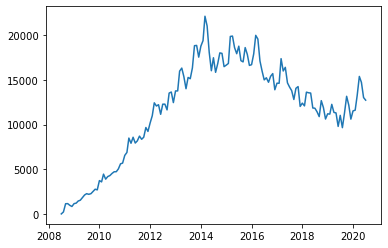

In [81]:
# Making a Basic Graph
plt.plot(pivoted_data.index, pivoted_data['java'])

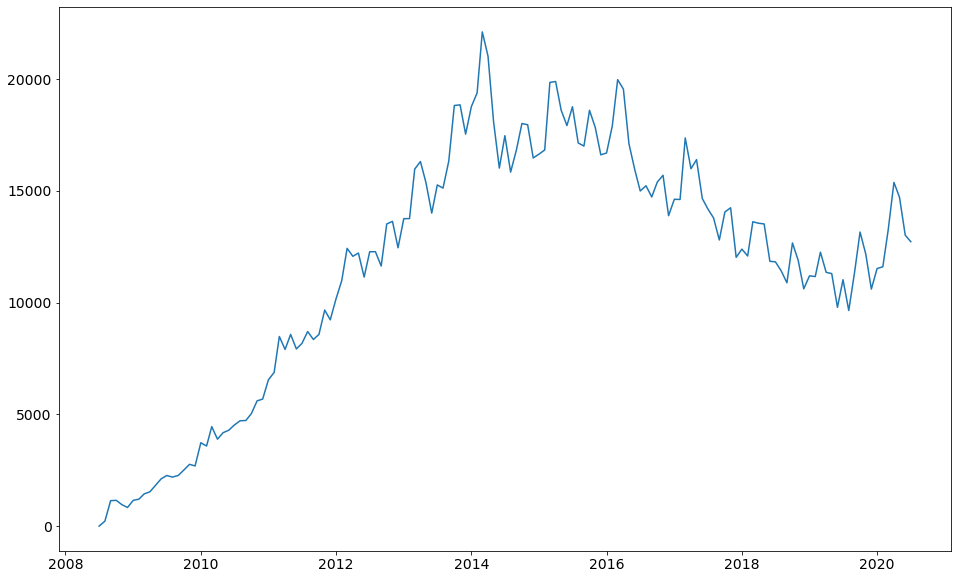

In [83]:
# Styling the graph
# figsize to resize the graph size
plt.figure(figsize=(16,10))

# yticks and xticks to set fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(pivoted_data.index, pivoted_data['java'])

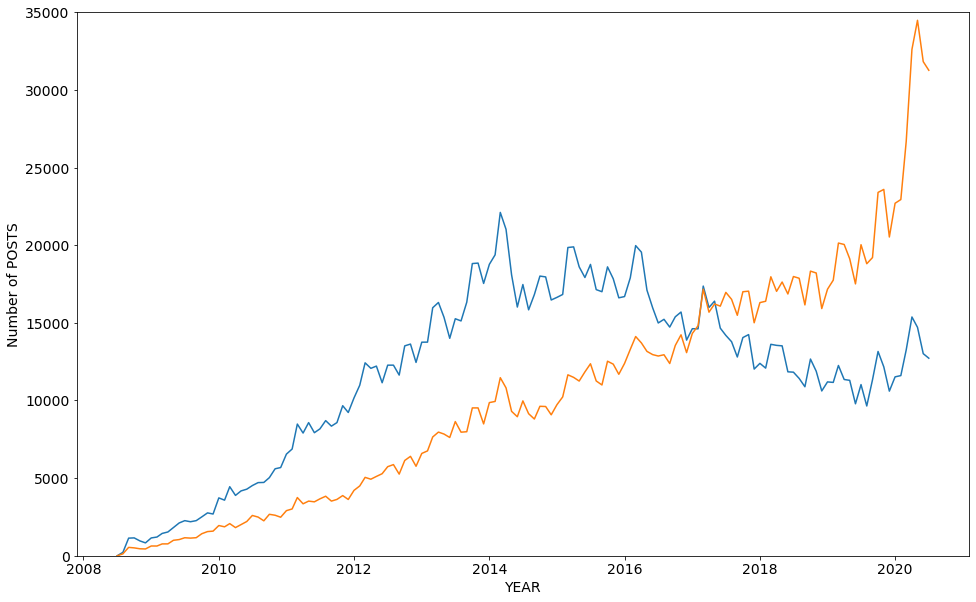

In [88]:
# PLOTTING 2 PROGRAMMING LANGUANGE
# Styling the graph
# figsize to resize the graph size
plt.figure(figsize=(16,10))

# yticks and xticks to set fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Give label using xlabel and ylabel
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Number of POSTS", fontsize = 14)

# Give Limit to y axis
plt.ylim(0,35000)

plt.plot(pivoted_data.index, pivoted_data['java'])
plt.plot(pivoted_data.index, pivoted_data['python'])


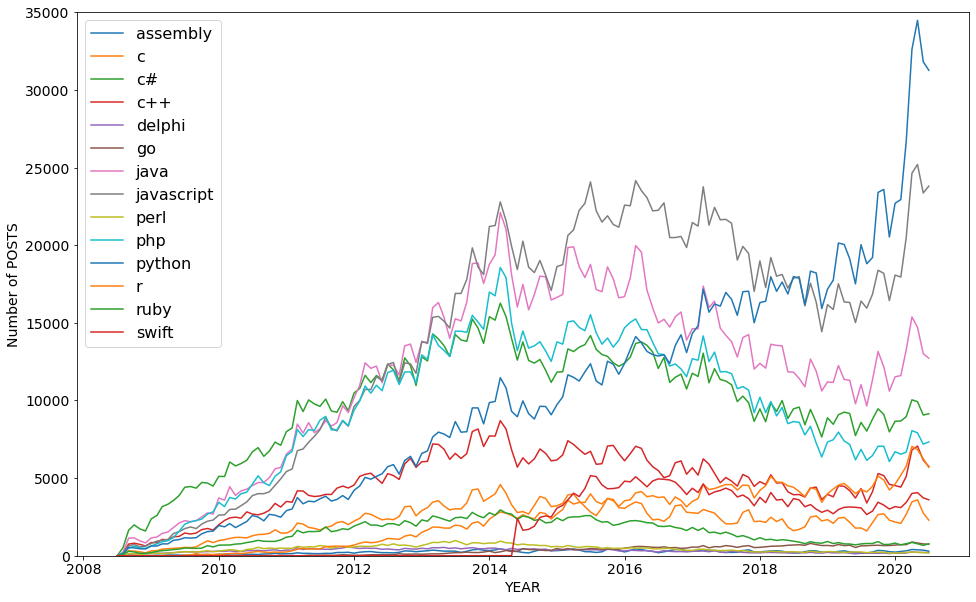

In [92]:
# PLOTTING ALL THE PROGRAMMING LANGUANGE
# Styling the graph
# figsize to resize the graph size
plt.figure(figsize=(16,10))

# yticks and xticks to set fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Give label using xlabel and ylabel
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Number of POSTS", fontsize = 14)

# Give Limit to y axis
plt.ylim(0,35000)

# To Print all the tags
for tag in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[tag], label=tag)

# To print the legends as well
plt.legend(loc='upper left',fontsize=16)

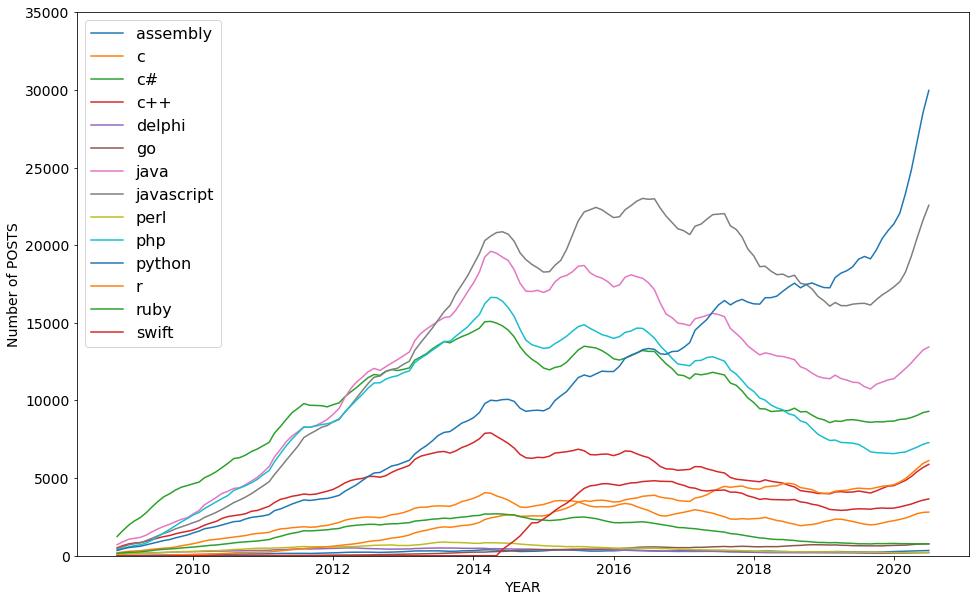

In [97]:
# Create a new dataframe to smoothout the graph, compare this to the upper graph 
# The Rolling and mean will average the data per 6 instances 
smooth_df = pivoted_data.rolling(window=6).mean()

# PLOTTING ALL THE PROGRAMMING LANGUANGE
# Styling the graph
# figsize to resize the graph size
plt.figure(figsize=(16,10))

# yticks and xticks to set fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Give label using xlabel and ylabel
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Number of POSTS", fontsize = 14)

# Give Limit to y axis
plt.ylim(0,35000)

# To Print all the tags
for tag in smooth_df.columns:
    plt.plot(smooth_df.index, smooth_df[tag], label=tag)

# To print the legends as well
plt.legend(loc='upper left',fontsize=16)